<a href="https://colab.research.google.com/github/11DiajengNidzom/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow 
from skimage import io

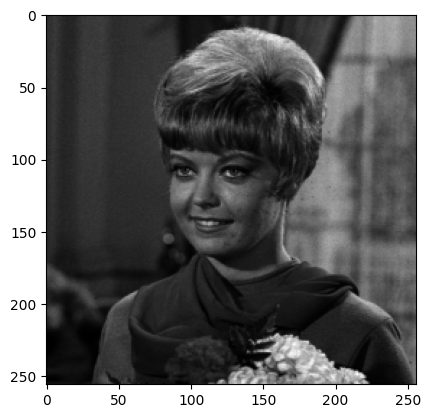

In [3]:
#meload image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [4]:
#mean(rata-rata)
def mf(img, FilterSize):
    #pertama membuat array
    output = np.zeros(img.shape, np.uint8)
    #berikut adalah varibale yang bernilai kosong
    result = 0
    #filter
    for d in range(1, img.shape[0]-1):
      for i in range(1, img.shape[1]-1):
        for a in range(-1, 2):
          for j in range(-1, 2):
            result = result + img[d+j, i+j]
        output[d][i] = int(result / FilterSize)
        result = 0

    return output

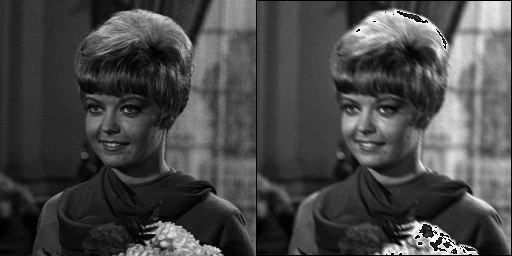

In [ ]:
#tampil gambar pd mean
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
ImgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
mean_filtering = mf(ImgGray, 6)
final_frame = cv.hconcat((ImgGray, mean_filtering))
cv2_imshow(final_frame)

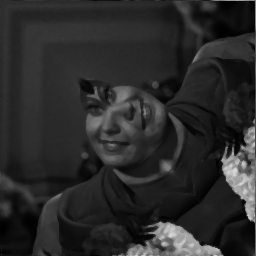

In [ ]:
#median(nilai tengah)
from cv2 import * 
import cv2

# source = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', CV_LOAD_IMAGE_GRAYSCALE)
final = img_gray[:]
for i in range(len(img_gray)):
  for d in range(i):
      final[i,d]=img_gray[i,d]

# unutk membuat kernel filter kosong
members=[img_gray[0,0]]*10

#filter
for d in range(1,img_gray.shape[0]-1):
  for i in range(1,img_gray.shape[1]-1):
            members[0] = img_gray[i-1,d-1]
            members[1] = img_gray[i,d-1]
            members[2] = img_gray[i+1,d-1]
            members[3] = img_gray[i-1,d]
            members[4] = img_gray[i,d]
            members[5] = img_gray[i+1,d]
            members[6] = img_gray[i-1,d+1]
            members[7] = img_gray[i,+1]
            members[8] = img_gray[i+1,d+1]
            members.sort()
            final[d,i]=members[4]

cv2_imshow(final)

In [ ]:
#modus(nilai yang sering muncul)
def ifil(img, FilterSize):
   
    #membuat array
    output = np.zeros(img.shape, dtype=np.uint8)

    #membuat padding atau ruang kosong 
    padding_width = FilterSize // 2
    pd_img = np.pad(img, padding_width, mode='constant')

    for a in range(padding_width, pd_img.shape[0] - padding_width):
        for b in range(padding_width, pd_img.shape[1] - padding_width):

            #membuat array 
            Values = np.zeros(FilterSize * FilterSize, dtype=np.uint8)
            r = 0

            #iterasi pada setiap piksel
            for x in range(-padding_width, padding_width + 1):
                for y in range(-padding_width, padding_width + 1):
                    Values[r] = pd_img[a + x, b + y]
                    r += 1
            #menghitung nilai pd modus
            mode_value = np.bincount(Values).argmax()
            #hasil dr nilai modus
            output[a - padding_width, b - padding_width] = mode_value

    return output

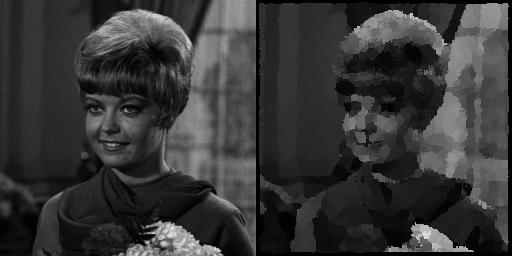

In [ ]:
#tampil gambar pd modus
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
ImgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
mode = ifil(ImgGray, 9)
final_frame = cv.hconcat((ImgGray, mode))
cv2_imshow(final_frame)

In [ ]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)
  #membuat dimensi pd kernel
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  #menghitung hasil kernel
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  #membuat gambar baru
  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for d in range(0, output_height):
    for i in range(0, output_width):
      
      new_image[i][d] = np.sum(image[i * stride:i * stride + kernel_height, d * stride:d * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [ ]:
#high pass pd kernel
kernel_high_pass = np.array([
      [-1,0,1],
      [-1,0,3],
      [-3,0,1]
  ])

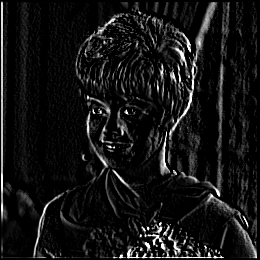

In [ ]:
#memfilter image
filtered_image9 = convolution2d(img_gray, kernel_high_pass,1,3)
cv2_imshow(filtered_image9)

In [ ]:
#low pass pd kernel
kernel_low_pass = np.array([
      [1,1,1],
      [1,4,1],
      [1,1,1]
  ]) / 12

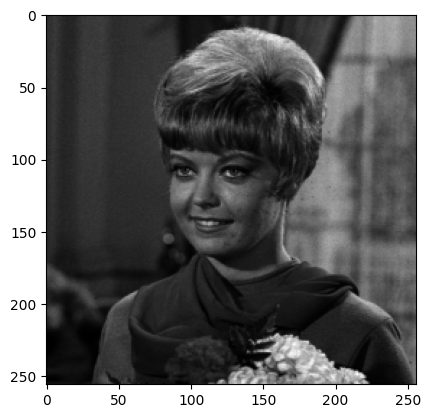

In [ ]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray2, cmap='gray')

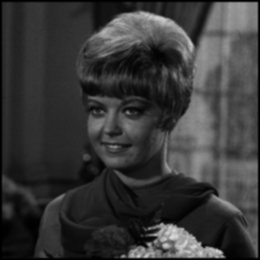

In [ ]:
#hasil dr Low Pass
filtered_image11 = convolution2d(img_gray2, kernel_low_pass,1,3)
cv2_imshow(filtered_image11)